#### Installing required packages

In [1]:
#Importing required libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
# import matplotlib

# %matplotlib qt

# Importing individual logs from files and different folders
This step is only needed if you have the raw data, otherwise proceed with next section


In [11]:
from folders_paths import *
print(folder_labels, folder_paths)

[5, 10, 20, 25, 50, 100] ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w5', '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w10', '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w20', '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w25', '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w50', '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w100']


In [8]:
# GET 50 W 15DP
folder_paths = ['/Users/gb4818/Desktop/REvoSim_output']
folder_labels = [15]

# Create a list to store individual DataFrames
dataframes = []

for i, folder_path in enumerate(folder_paths):
    # Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_.*\.txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            #df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5], names=['Iteration_number', 'Species_count'])
            
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5])
            
            # Remove duplicates
            df = df.drop_duplicates()
            
            # Add 'simulation' and 'folder_label' columns
            df['Simulation'] = filename
            df['dp'] = folder_labels[i]
            
            # Append the modified DataFrame to the list
            dataframes.append(df)

# Concatenate all data in a pandas dataframe
combined_df = pd.concat(dataframes, ignore_index=True)
# save in a csv file
#combined_df.to_csv('w50_15dp_iterations_species_richness.csv')

### Importing ALL data and saving in separate df

In [12]:
# Create a list to store individual DataFrames
dataframes = []

for i, folder_path in enumerate(folder_paths):
    # Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_.*\.txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            #df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5], names=['Iteration_number', 'Species_count'])
            
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5])
            
            # Remove duplicates
            df = df.drop_duplicates()
            
            # Add 'simulation' and 'folder_label' columns
            df['Simulation'] = filename
            df['Environment'] = folder_labels[i]
            
            # Append the modified DataFrame to the list
            dataframes.append(df)

# Concatenate all data in a pandas dataframe
combined_df = pd.concat(dataframes, ignore_index=True)


# Importing data from csv generated from HPC data

In [5]:
combined_df = pd.read_csv('/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files/w50_15dp_iterations_species_richness.csv', index_col=0)      

In [6]:
print(combined_df.tail())
print(combined_df.head())
print(combined_df['Simulation'].nunique())
# combined_df = combined_df.rename(columns={'Iteration_number': 'Iteration_Number'})
# combined_df = combined_df.rename(columns={'Species_count': 'Species_Count'})

      Iteration_Number  Species_Count          Simulation  dp
1996             99799             72  REvoSim_log_HL.txt  15
1997             99849             72  REvoSim_log_HL.txt  15
1998             99899             71  REvoSim_log_HL.txt  15
1999             99949             72  REvoSim_log_HL.txt  15
2000             99999             71  REvoSim_log_HL.txt  15
      Iteration_Number  Species_Count                          Simulation  dp
2001                 0              1  REvoSim_log_envw50_15dp_aj1323.txt  15
2002                49              1  REvoSim_log_envw50_15dp_aj1323.txt  15
2003                99              1  REvoSim_log_envw50_15dp_aj1323.txt  15
2004               149              1  REvoSim_log_envw50_15dp_aj1323.txt  15
2005               199              1  REvoSim_log_envw50_15dp_aj1323.txt  15
3000


In [ ]:
# Calculate Average and Medians
average_species_count = combined_df.groupby(['Environment', 'Iteration_Number'])['Species_Count'].mean().reset_index()
median_species_count = combined_df.groupby(['Environment', 'Iteration_Number'])['Species_Count'].median().reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

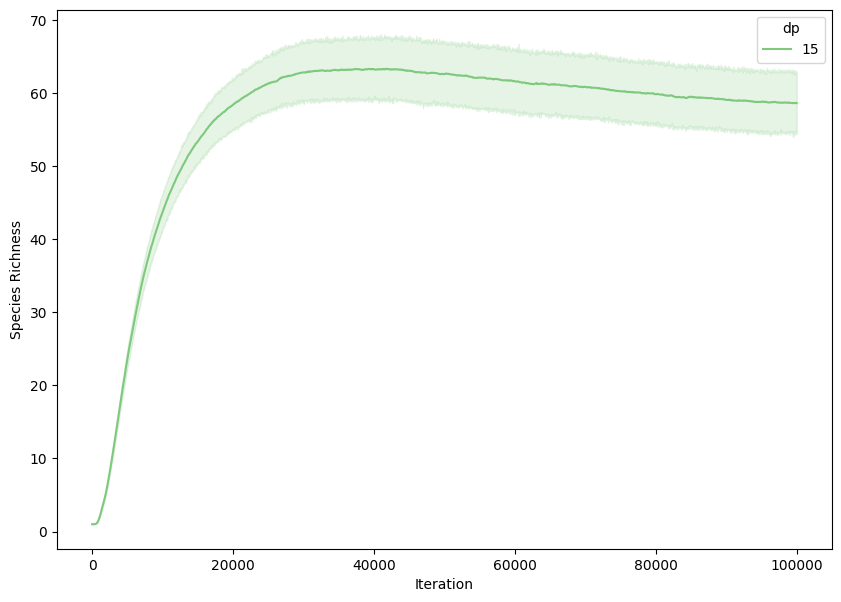

In [8]:
# Plot Iteration number VS species richness
plt.figure(figsize=(10, 7))
sns.lineplot( data = combined_df, x = 'Iteration_Number', y = 'Species_Count', hue = 'dp', palette = 'Accent')
plt.xlabel("Iteration")
plt.ylabel("Species Richness")
plt.show

In [ ]:
# # Plot Iteration number VS species richness
# plt.figure(figsize=(20, 10))
# sns.lineplot( data = combined_df, x = 'Iteration_Number', y = 'Species_Count', hue = 'Environment', units='Simulation', estimator=None, lw=1, palette = 'Accent')
# plt.xlabel("Iteration")
# plt.ylabel("Species Richness")
# plt.show
# # Group the combined DataFrame by 'Environment'
# grouped_df = combined_df.groupby('Environment')

# # Define the number of unique environments for coloring
# num_environments = len(grouped_df)
# colors = sns.color_palette("viridis", num_environments)
# palette = ['gray']

# # Plot for each environment
# for i, (environment, data) in enumerate(grouped_df):
#     # Plot Iteration number VS species richness
#     plt.figure(figsize=(10, 5))
#     sns.lineplot( data = data, x = 'Iteration_Number', y = 'Species_Count', hue = 'Simulation', units='Simulation', estimator=None, lw=1)
#     plt.title(environment)
#     plt.xlabel("Iteration")
#     plt.ylabel("Species Richness")
#     plt.show

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_19251/1514493205.py:22: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


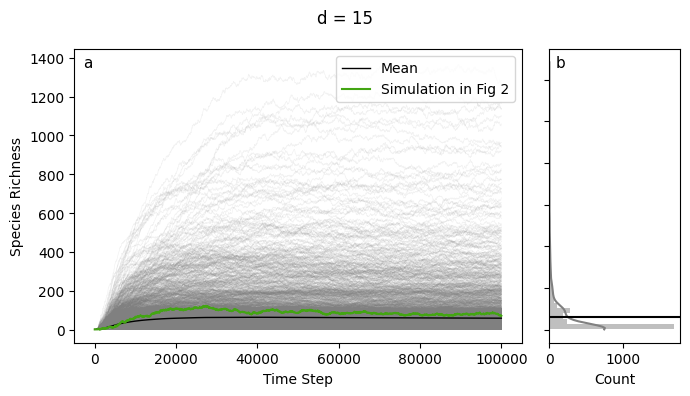

In [29]:
# Group the combined DataFrame by 'Environment'
grouped_df = combined_df.groupby('dp')

# Define the number of unique environments for coloring
num_environments = len(grouped_df)
colors = sns.color_palette("viridis", num_environments)
palette = ['gray']

#filder one dataframe ro get only one simylation and highlight that
one_sim = combined_df[combined_df['Simulation']== 'REvoSim_log_HL.txt']

# Plot for each environment
for i, (environment, data) in enumerate(grouped_df):
    fig = plt.figure(figsize=(7, 4))
    fig.suptitle(f"d = {environment}", fontsize=12)
    plt.subplots_adjust(top=0.3)
    #greting a grid for the two plots
    gs = gridspec.GridSpec(3, 4)
    ax_main = plt.subplot(gs[:, :3])  # Adjusted the column index
    ax_yDist = ax_yDist = plt.subplot(gs[:, 3])
    
    sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)
    # Calculate mean and median for each iteration
    mean_values = data.groupby('Iteration_Number')['Species_Count'].mean()
    #meadian_value = data.groupby('Iteration_Number')['Species_Count'].median()
    # Plot mean line
    ax_main.plot(mean_values.index, mean_values.values,  color='Black', linewidth = 1 , label='Mean')
    #ax_main.plot(meadian_value.index, meadian_value.values,  color=colors[i], linestyle='-', label='Median')
    # Add an individual simulation highlighted
    sns.lineplot(data=one_sim, x='Iteration_Number', y='Species_Count', ax = ax_main,  legend=False, linewidth = 1.5, label= 'Simulation in Fig 2', color='#43A513')


    # Plot distribution at equilibrium
    data_hist = data[data['Iteration_Number'] == 99999]
    sns.histplot(data = data_hist, y = 'Species_Count', bins=50, ax=ax_yDist, color='gray', kde=True, edgecolor = 'none' ) 
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax_yDist.axhline(y=mean_hist, color='black', linewidth=1.5, label='Mean')
    
    
    #annotate a and b on the two panels
    ax_main.annotate('a', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    ax_yDist.annotate('b', xy=(0.05, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    # Set title and axis
    #ax_main.set_title(f"d = {environment}")
    ax_main.set_xlabel("Time Step")
    ax_main.set_ylabel("Species Richness")

    # Remove labels of numbers on the y-axis ans set labels
    ax_yDist.set_yticklabels([])
    ax_yDist.set_xlabel("Count")
    ax_yDist.set(ylabel=None)
    
    # Reduce the space between subplots
    plt.subplots_adjust(wspace=0.0)  
    
    # Show legend
    ax_main.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_46260/595509631.py:22: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count' , hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


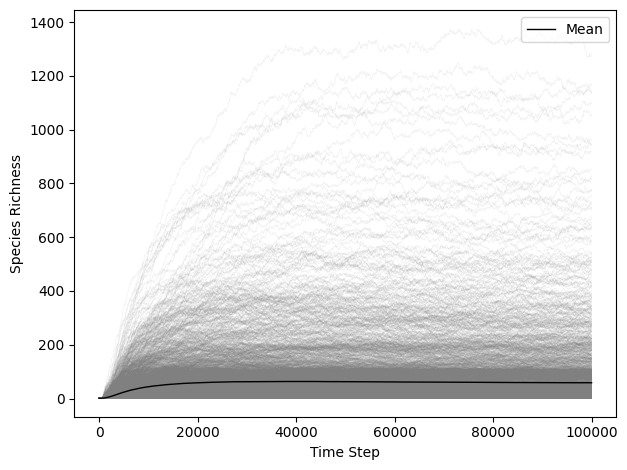

In [10]:
# Group the combined DataFrame by 'Environment'
grouped_df = combined_df.groupby('dp')

# Define the number of unique environments for coloring
num_environments = len(grouped_df)
colors = sns.color_palette("viridis", num_environments)
palette = ['gray']

#filder one dataframe ro get only one simylation and highlight that
one_sim = combined_df[combined_df['Simulation']== 'REvoSim_log_HL.txt']

# Plot for each environment
for i, (environment, data) in enumerate(grouped_df):
    # fig = plt.figure(figsize=(7, 4))
    # fig.suptitle(f"d = {environment}", fontsize=12)
    # plt.subplots_adjust(top=0.3)
    # #greting a grid for the two plots
    # gs = gridspec.GridSpec(3, 4)
    # ax_main = plt.subplot(gs[:, :3])  # Adjusted the column index
    # ax_yDist = ax_yDist = plt.subplot(gs[:, 3])
    
    sns.lineplot(data=data, x='Iteration_Number', y='Species_Count' , hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)
    # Calculate mean and median for each iteration
    mean_values = data.groupby('Iteration_Number')['Species_Count'].mean()
    #meadian_value = data.groupby('Iteration_Number')['Species_Count'].median()
    # Plot mean line
    plt.plot(mean_values.index, mean_values.values,  color='Black', linewidth = 1 , label='Mean')
    #ax_main.plot(meadian_value.index, meadian_value.values,  color=colors[i], linestyle='-', label='Median')
    
    plt.xlabel("Time Step")
    plt.ylabel("Species Richness")

    
    # Show legend
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Get unique simulation values
simulations = combined_df['Simulation'].unique()
# Create a line plot for each simulation
for simulation in simulations:
    # Filter data for the current simulation
    simulation_data = combined_df[combined_df['Simulation'] == simulation]
    sns.lineplot(data=simulation_data, x='Iteration_Number', y='Species_Count', hue='Simulation')
    
    # Add title
    plt.title(f'Line Plot for Simulation: {filename}')
    
    # Show the plot
    plt.show()

In [ ]:
# bug = combined_df[combined_df['Simulation'] == 'REvoSim_log_1.txt']
# bug.to_csv('faulty_sim.csv', index=False)

In [29]:
equi50 = combined_df[combined_df['Iteration_Number'] == 49999]
equi100 = combined_df[combined_df['Iteration_Number'] == 99999]

mean50 = equi50.groupby("Environment")['Species_Count'].mean().reset_index()
mean100 = equi100.groupby("Environment")['Species_Count'].mean().reset_index()

max50 = equi50.groupby("Environment")['Species_Count'].max().reset_index()
max100 = equi100.groupby("Environment")['Species_Count'].max().reset_index()

merged_equi = pd.merge(mean50, mean100, on='Environment', suffixes=('_μ 50k', '_μ 100k'))
merged_max = pd.merge(max50, max100, on='Environment', suffixes=('_max_50k', '_max_100k '))
merged = pd.merge(merged_equi, merged_max, on='Environment', suffixes=('means', 'maxs'))



Text(0.5, 1.0, 'Mean Species Richness at Equilibrium')

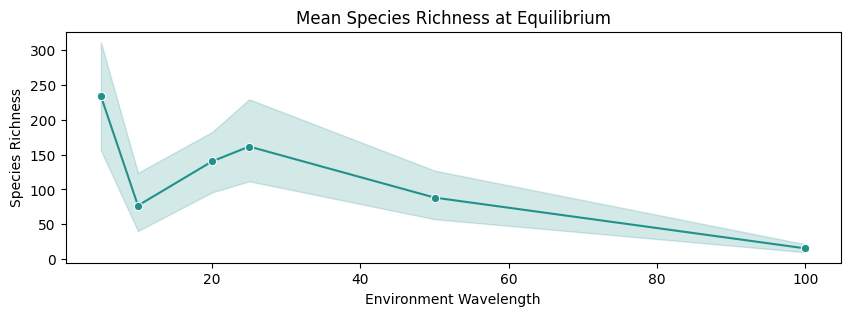

In [35]:
### Now I'm creating a graph that will show the wavelength on the xaxis and the average/median SP that we had at equilibrium
equilibrium = combined_df[combined_df['Iteration_Number'] == 99999]

plt.figure(figsize=(10, 3))
sns.lineplot(data =  equilibrium, x = 'Environment', y = 'Species_Count', color = colors[0], marker='o')
plt.xlabel('Environment Wavelength')
plt.ylabel('Species Richness')
plt.title('Mean Species Richness at Equilibrium')

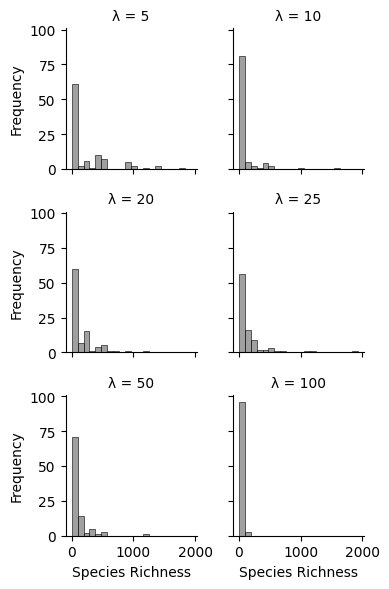

In [50]:
# Rename the column 'Environment' to 'λ'
equilibrium = equilibrium.rename(columns={'Environment': 'λ'})

# Create the displot with facets based on 'λ'
g = sns.displot(
    equilibrium, x="Species_Count", col="λ", col_wrap=2, height=2, aspect=1, bins=20, color='gray'
)
# Set x-label and y-label
g.set_xlabels("Species Richness")
g.set_ylabels("Frequency")
# Rename the column 'λ' back to 'Environment'
equilibrium = equilibrium.rename(columns={'λ': 'Environment'})

In [14]:
# Add missing Ws so that the violin plots are in the correct order and spacing on the x axis (this is a huge workaround)
# Create a DataFrame for missing environments with NaN values
missing = list(range(55, 100, 5)) + list(range(30, 50, 5)) + [15]
missing_df = pd.DataFrame({'Environment': missing,
                           'Simulation': [None] * len(missing),
                           'Species_Count': [None] * len(missing),
                           'Simulation': [None] * len(missing)})

# Append rows for missing environments with NaN values
equilibrium = pd.concat([equilibrium, missing_df], ignore_index=True)

# Sort the DataFrame by the 'Environment' column
equilibrium = equilibrium.sort_values(by='Environment').reset_index(drop=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


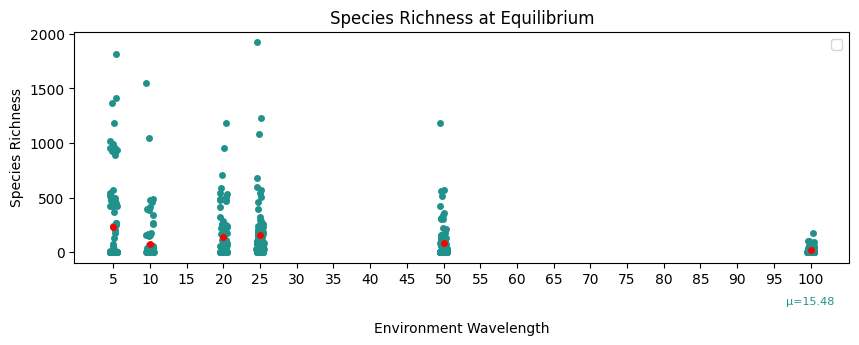

In [15]:
plt.figure(figsize=(10, 3))
# Same data but different graphs: Jitter plot
ax = sns.stripplot(data=equilibrium, x='Environment', y='Species_Count', jitter=True, color=colors[0])

# Add mean points
ws = equilibrium['Environment'].unique()  # Get unique categories in sorted order
mean_values = []

# Annotating mean values
for i, w in enumerate(ws):
    mean_val = equilibrium[equilibrium['Environment'] == w]['Species_Count'].mean()
    ax.plot(i, mean_val, 'o', color="red", markersize=4, zorder=3)  # Plot mean point
if not pd.isnull(mean_val):  # Check if mean value is not NaN
        ax.text(i, -450, f'μ={mean_val:.2f}', verticalalignment='center', horizontalalignment='center', fontsize=8, color=colors[0])
        mean_values.append(mean_val)

# Labels and title
plt.xlabel("Environment Wavelength", labelpad=25)
plt.ylabel("Species Richness")
plt.title("Species Richness at Equilibrium")
plt.legend()
plt.show()



/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_46260/415355248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=equilibrium, x='Environment', y='Species_Count', palette='colorblind', alpha=0.7, cut=0, inner="quartile")
/Users/gb4818/code/revosim-simulations/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/gb4818/code/revosim-simulations/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/gb4818/code/revosim-simulations/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/User

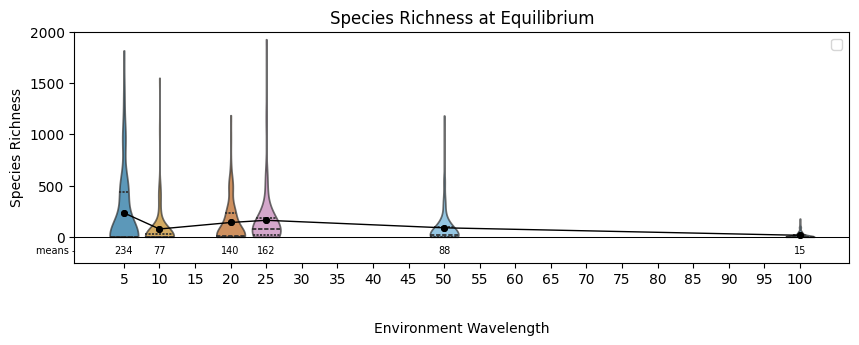

In [16]:
plt.figure(figsize=(10, 3))
# Same data, different chart: Violin plots
ax = sns.violinplot(data=equilibrium, x='Environment', y='Species_Count', palette='colorblind', alpha=0.7, cut=0, inner="quartile")

# Add mean points
ws = equilibrium['Environment'].unique()  # Get unique categories in sorted order
mean_values = []

# adding a plot for the mean
for i, w in enumerate(ws):
    # Calculate median and mean
    median_val = equilibrium[equilibrium['Environment'] == w]['Species_Count'].median()
    mean_val = equilibrium[equilibrium['Environment'] == w]['Species_Count'].mean()
    ax.plot(i, mean_val, 'o', color="black", markersize=4, zorder=3)  # Plot mean point
    if not pd.isnull(mean_val):  # Check if mean value is not NaN
        ax.text(i, -125, f'{mean_val:.0f}', verticalalignment='center', horizontalalignment='center', fontsize=7, color='Black')
        mean_values.append(mean_val)
        
# Plot line connecting mean points
ax.plot([0, 1, 3, 4, 9, 19], mean_values, marker='o', color='black', linewidth=1, linestyle='-', zorder=3, markersize=4)
# Custom annotation for 'means' on the left side of the y-axis
ax.text(-2.48, -125, 'means -', verticalalignment='center', horizontalalignment='left', fontsize=7, color='Black')
# Add horizontal line to simulate a box
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.75)

# Labels and title
plt.ylim(-250, 2000)
plt.xlabel("Environment Wavelength", labelpad=25)
plt.ylabel("Species Richness")
plt.title("Species Richness at Equilibrium")
plt.legend()
plt.show()

## Relative species abundaces over time

In [ ]:
# relative abundaces over time
# Create a list to store individual DataFrames
dataframes = []

for i, folder_path in enumerate(folder_paths):
    # Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 6, 9])
            # calculate relative abundance
            # group by 'Iteration_Number' and 'Species_ID', sum up 'Species_Population'
            grouped = df.groupby(["Iteration_Number", 'Species_ID'])['Species_Population'].sum().reset_index()
            
            # Add 'simulation' and 'folder_label' columns
            grouped['Simulation'] = filename
            grouped['Environment'] = folder_labels[i]
            # total population for each iteration
            total_population = grouped.groupby('Iteration_Number')['Species_Population'].sum()

            # relative abundance:
            grouped['Rel_ab'] = grouped.apply(lambda row: row['Species_Population']/total_population[row['Iteration_Number']], axis=1)
            
            # Append the modified DataFrame to the list
            dataframes.append(grouped)

# Concatenate all DataFrames in the list
abundances = pd.concat(dataframes, ignore_index=True)

In [ ]:
# Make a line graph with species abundances
# I esclude scpecies 1 because they are the most dominand and the common ancestor

# Step 1: Select 5 random simulations from the 5 different environments
selected_simulations = []

for env_label in [5, 10, 25, 50, 100]:
    # Filter dataframes by environment label
    environment_dataframes = [df for df in dataframes if df['Environment'].iloc[0] == env_label]
    # Randomly select one dataframe from this environment
    selected_df = random.choice(environment_dataframes)
    selected_simulations.append(selected_df)

# Step 2: Filter out Species_ID == 1 for each selected simulation
for df in selected_simulations:
    df_filtered = df[df['Species_ID'] != 1]

    # Step 3: Create graphs for each filtered simulation
    plt.figure(figsize=(10, 6))
    # Use Seaborn to create the graph
    sns.lineplot(data=df_filtered, x='Iteration_Number', y='Species_Population', hue='Species_ID', 
                 palette='colorblind', legend=False)
    plt.title(f'Simulation - Environment {df_filtered["Environment"].iloc[0]} (Species_ID != 1)')
    plt.xlabel('Iteration Number')
    plt.ylabel('Species Population')
    plt.tight_layout()
    plt.show()
